In [1]:
import nltk
from nltk.corpus import brown
%matplotlib inline

In [2]:
# 布朗语料库示例
print(brown.categories())
print(len(brown.sents()))
print(len(brown.words()))

['adventure', 'belles_lettres', 'editorial', 'fiction', 'government', 'hobbies', 'humor', 'learned', 'lore', 'mystery', 'news', 'religion', 'reviews', 'romance', 'science_fiction']
57340
1161192


In [3]:
df = pd.read_csv(r"D:\资料\教程\NLP基础-网易云课堂\TMData190320\PythonData\金庸-射雕英雄传txt精校版.txt", names=["txt"], sep='aaa', encoding="gbk")
df.head(10)

d:\python_install\venv_set\py353\dataanalysiscase\lib\site-packages\ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


,txt
0,全本全集精校小说尽在：http://www.yimuhe.com/u/anglewing26...
1,更多资源下载：http://qqzone.ctdisk.com
2,"※声明：本电子书仅供读者预览,请在下载24小时内删除，不得用作商业用途；如果喜欢请购买正版图书！※"
3,------------------------------------------
4,“金庸作品集”新序
5,小说是写给人看的。小说的内容是人。
6,小说写一个人、几个人、一群人、或成千成万人的性格和感情。他们的性格和感情从横面的环境中反映出...
7,西洋传统的小说理论分别从环境、人物、情节三个方面去分析一篇作品。由于小说作者不同的个性与才能...
8,基本上，武侠小说与别的小说一样，也是写人，只不过环境是古代的，主要人物是有武功的，情节偏重于...
9,小说是艺术的一种，艺术的基本内容是人的感情和生命，主要形式是美，广义的、美学上的美。在小说，...


In [4]:
# 构建新列
print(len(df))
print(df.shape)
def m_head(tmpstr):
    return tmpstr[:1]

def m_mid(tmpstr):
    return tmpstr.find("回 ")

df["head"] = df.txt.apply(m_mid)
df["mid"] = df.txt.apply(m_head)
df["len"] = df.txt.apply(len)
df.head(10)

7165
(7165, 1)


,txt,head,mid,len
0,全本全集精校小说尽在：http://www.yimuhe.com/u/anglewing26...,-1,全,55
1,更多资源下载：http://qqzone.ctdisk.com,-1,更,31
2,"※声明：本电子书仅供读者预览,请在下载24小时内删除，不得用作商业用途；如果喜欢请购买正版图书！※",-1,※,49
3,------------------------------------------,-1,-,42
4,“金庸作品集”新序,-1,“,9
5,小说是写给人看的。小说的内容是人。,-1,小,17
6,小说写一个人、几个人、一群人、或成千成万人的性格和感情。他们的性格和感情从横面的环境中反映出...,-1,小,225
7,西洋传统的小说理论分别从环境、人物、情节三个方面去分析一篇作品。由于小说作者不同的个性与才能...,-1,西,56
8,基本上，武侠小说与别的小说一样，也是写人，只不过环境是古代的，主要人物是有武功的，情节偏重于...,-1,基,151
9,小说是艺术的一种，艺术的基本内容是人的感情和生命，主要形式是美，广义的、美学上的美。在小说，...,-1,小,133


In [5]:
# 标明章序号
chapnum = 0
for i in range(len(df)):
    if df["mid"][i] == "第" and df["head"][i] > 0 and df["len"][i] < 30:
        chapnum += 1
    if chapnum >= 40 and df.txt[i] == "附录一：成吉思汗家族":
        chapnum = 0
    df.loc[i, "chap"] = chapnum

df.head(50)

,txt,head,mid,len,chap
0,全本全集精校小说尽在：http://www.yimuhe.com/u/anglewing26...,-1,全,55,0.0
1,更多资源下载：http://qqzone.ctdisk.com,-1,更,31,0.0
2,"※声明：本电子书仅供读者预览,请在下载24小时内删除，不得用作商业用途；如果喜欢请购买正版图书！※",-1,※,49,0.0
3,------------------------------------------,-1,-,42,0.0
4,“金庸作品集”新序,-1,“,9,0.0
5,小说是写给人看的。小说的内容是人。,-1,小,17,0.0
6,小说写一个人、几个人、一群人、或成千成万人的性格和感情。他们的性格和感情从横面的环境中反映出...,-1,小,225,0.0
7,西洋传统的小说理论分别从环境、人物、情节三个方面去分析一篇作品。由于小说作者不同的个性与才能...,-1,西,56,0.0
8,基本上，武侠小说与别的小说一样，也是写人，只不过环境是古代的，主要人物是有武功的，情节偏重于...,-1,基,151,0.0
9,小说是艺术的一种，艺术的基本内容是人的感情和生命，主要形式是美，广义的、美学上的美。在小说，...,-1,小,133,0.0


In [6]:
# 提取第一章
df[df.chap == 1].head()

,txt,head,mid,len,chap
31,第一回 风雪惊变,2,第,8,1.0
32,钱塘江浩浩江水，日日夜夜无穷无休的从两浙西路临安府牛家村边绕过，东流入海。江畔一排数十株乌柏...,-1,钱,136,1.0
33,那说话人五十来岁年纪，一件青布长袍早洗得褪成了蓝灰带白。只听他两片梨花木板碰了几下，左手中竹...,-1,那,81,1.0
34,几处败垣围故井，向来一一是人家。”,-1,几,17,1.0
35,那说话人将木板敲了几下，说道：“这首七言诗，说的是兵火过后，原来的家家户户，都变成了断墙残瓦...,-1,那,342,1.0


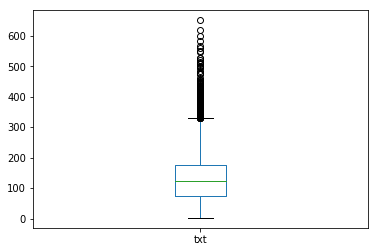

In [7]:
# 每段字数统计
df.txt.agg(len).plot.box()

In [8]:
dfgrp = df.groupby("chap")
chapter = dfgrp.apply(sum)
chapter = chapter[chapter.index != 0]
chapter

,txt,head,mid,len,chap
chap,,,,,
1.0,第一回 风雪惊变钱塘江浩浩江水，日日夜夜无穷无休的从两浙西路临安府牛家村边绕过，东流入海。江...,-224,第钱那几那“他那为若“众村郭小郭张郭张郭张郭张杨杨只隔郭张砰张郭张杨张郭郭杨当便只曲郭郭却曲...,27448,227.0
2.0,第二回 江南七怪颜烈跨出房门，过道中一个中年士人拖着鞋皮，踢跶踢跶的直响，一路打着哈欠迎面过...,-198,第颜颜那颜颜店包包过盖包过盖那包只颜包颜包完完包完突那那完他完那那完这完只完两忽完完完看过和...,25414,402.0
3.0,第三回 黄沙莽莽寺里僧众见焦木圆寂，尽皆悲哭。有的便为伤者包扎伤处，抬入客舍。忽听得巨钟下的...,-196,第寺忽柯朱法过过丘柯丘朱丘柯柯江丘丘韩丘江丘这韩丘丘丘丘柯全丘韩丘丘韩段段段他李过段李段段每...,22813,597.0
4.0,第四回 黑风双煞完颜洪熙笑道：“好，再打他个痛快。”蒙古兵前哨报来：“王罕亲自前来迎接大金国...,-203,第完沙王王酒铁王完第完哲铁桑完帐铁铁铁哲蒙完完桑桑四赤铁完次白拖那拖那拖拖都四都郭都正都那这...,23324,824.0
5.0,第五回 弯弓射雕一行人下得山来，走不多时，忽听前面猛兽大吼声一阵阵传来。韩宝驹一提缰，胯下黄...,-160,第一韩这郭郭郭朱韩拖郭忽铁完铁都她两铁四铁桑铁完铁全铁江韩江当六全他韩每六漠在朔这韩朱七这南...,20706,815.0
6.0,第六回 崖顶疑阵午饭以后，郭靖来到师父帐中。全金发道：“靖儿，我试试你的开山掌练得怎样了。”...,-216,第午郭柯郭朱郭六朱六朱朱郭郭帐韩等这韩时但两韩柯韩柯柯柯南韩这韩柯那那那郭郭过梅过一这郭郭两...,25984,1314.0
7.0,第七回 比武招亲江南六怪与郭靖晓行夜宿，向东南进发，在路非止一日，过了大漠草原。这天离张家口...,-191,第江这他郭郭郭郭说郭朱韩朱说朱朱八朱八只只只柯南柯当各郭道只只郭张那一郭一郭那那那店少不那再...,26887,1358.0
8.0,第八回 各显神通王处一脚步好快，不多时便带同郭靖到了城外，再行数里，到了一个山峰背后。他不住...,-129,第王王郭郭王王王郭王王走那王王四来郭正王王完一来完完忽王那郭沙完这欧郭王完过那完完郭郭这完汤...,15754,1056.0
9.0,第九回 铁枪破犁郭黄二人来到赵王府后院，越墙而进，黄蓉柔声道：“你轻身功夫好得很啊！”郭靖伏...,-196,第郭过郭这黄那黄黄一两喝黄完完完穆穆完郭只郭绕两完完完完完完完郭郭他完黄完郭黄郭郭黄郭黄完简...,24167,1791.0


In [9]:
import jieba

In [10]:
tmpstr = "郭靖和哀牢山三十六剑。"
res = jieba.cut(tmpstr) # 精确模式
print(res)
print(' '.join(res))
res = jieba.cut(tmpstr) # 精确模式
print(list(word for word in res)) # 演示generator的用法
print(jieba.lcut(tmpstr))  # 结果直接输出为list
print("/".join(jieba.cut_for_search(tmpstr)))  # 全模式

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\nick\AppData\Local\Temp\jieba.cache


<generator object Tokenizer.cut at 0x0000012FC81B6308>


Loading model cost 0.686 seconds.
Prefix dict has been built succesfully.


郭靖 和 哀牢山 三十六 剑 。
['郭靖', '和', '哀牢山', '三十六', '剑', '。']
['郭靖', '和', '哀牢山', '三十六', '剑', '。']
郭靖/和/哀牢山/三十/十六/三十六/剑/。


In [11]:
# 增加字典词
jieba.add_word("哀牢山三十六剑")
print("/".join(jieba.cut(tmpstr)))
# 删除字典词
jieba.del_word("哀牢山三十六剑")
print("/".join(jieba.cut(tmpstr)))
# 载入字典
udict = r"D:\资料\教程\NLP基础-网易云课堂\TMData190320\PythonData\金庸小说词库.txt"
jieba.load_userdict(udict)
print("/".join(jieba.cut(tmpstr)))
# 去停用词
newlist = [w for w in jieba.cut(tmpstr) if w not in ["和", "。"]]
print(newlist)

郭靖/和/哀牢山三十六剑/。
郭靖/和/哀牢山/三十六/剑/。
郭靖/和/哀牢山三十六剑/。
['郭靖', '哀牢山三十六剑']


## pandas加载停用词

In [12]:
# pandas加载停用词
tmpdf = pd.read_csv(r"D:\资料\教程\NLP基础-网易云课堂\TMData190320\PythonData\停用词.txt", names=["w"], sep="aaa", encoding="utf-8")
print([w for w in jieba.cut(tmpstr) if w not in list(tmpdf.w)])
tmpdf.head()

['郭靖', '哀牢山三十六剑']


d:\python_install\venv_set\py353\dataanalysiscase\lib\site-packages\ipykernel_launcher.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  


,w
0,","
1,，
2,、
3,；
4,:


## jieba加载停用词

In [13]:
# jieba加载停用词
import jieba.analyse as ana
ana.set_stop_words(r"D:\资料\教程\NLP基础-网易云课堂\TMData190320\PythonData\停用词.txt")
print(jieba.lcut(tmpstr))
print(ana.extract_tags(tmpstr, topK=20))

['郭靖', '和', '哀牢山三十六剑', '。']
['郭靖', '哀牢山三十六剑']


In [14]:
# 词性标注
import jieba.posseg as psg
tmpres = psg.cut(tmpstr)
print(list(tmpres))
print(psg.lcut(tmpstr))

[pair('郭靖', 'x'), pair('和', 'c'), pair('哀牢山三十六剑', 'x'), pair('。', 'x')]
[pair('郭靖', 'x'), pair('和', 'c'), pair('哀牢山三十六剑', 'x'), pair('。', 'x')]


In [15]:
# 对第一章分词
jieba.lcut(chapter.txt[1])

['第一回',
 ' ',
 '风雪',
 '惊变',
 '钱塘江',
 '浩浩',
 '江水',
 '，',
 '日日夜夜',
 '无穷',
 '无休',
 '的',
 '从',
 '两',
 '浙西',
 '路',
 '临安',
 '府',
 '牛家村',
 '边',
 '绕过',
 '，',
 '东',
 '流入',
 '海',
 '。',
 '江畔',
 '一排',
 '数十株',
 '乌',
 '柏树',
 '，',
 '叶子',
 '似',
 '火烧',
 '般红',
 '，',
 '正是',
 '八月',
 '天时',
 '。',
 '村前村后',
 '的',
 '野草',
 '刚',
 '起始',
 '变黄',
 '，',
 '一抹',
 '斜阳',
 '映照',
 '之下',
 '，',
 '更增',
 '了',
 '几分',
 '萧索',
 '。',
 '两株',
 '大',
 '松树',
 '下',
 '围着',
 '一堆',
 '村民',
 '，',
 '男男女女',
 '和',
 '十几个',
 '小孩',
 '，',
 '正自',
 '聚精会神',
 '的',
 '听',
 '着',
 '一个',
 '瘦削',
 '的',
 '老者',
 '说话',
 '。',
 '那',
 '说话',
 '人',
 '五十',
 '来',
 '岁',
 '年纪',
 '，',
 '一件',
 '青布',
 '长袍',
 '早洗',
 '得',
 '褪成',
 '了',
 '蓝灰',
 '带白',
 '。',
 '只',
 '听',
 '他',
 '两片',
 '梨花',
 '木板',
 '碰',
 '了',
 '几下',
 '，',
 '左手',
 '中',
 '竹棒',
 '在',
 '一面',
 '小',
 '羯鼓',
 '上',
 '敲起',
 '得',
 '得',
 '连声',
 '。',
 '唱道',
 '：',
 '“',
 '小桃',
 '无主自',
 '开花',
 '，',
 '烟草',
 '茫茫',
 '带',
 '晚鸦',
 '。',
 '几处',
 '败垣围',
 '故井',
 '，',
 '向来',
 '一一',
 '是',
 '人家',
 '。',
 '”',
 '那',
 '说话',
 '人',
 '将',
 '木板',
 

In [16]:
# 统计词频1
word_list = jieba.lcut(" ".join(df.txt))
print(len(word_list))
print(word_list[:10])
df_word = pd.DataFrame(word_list, columns=["word"])
df_word.head()

626827
['全本', '全集', '精校', '小说', '尽', '在', '：', 'http', ':', '/']


,word
0,全本
1,全集
2,精校
3,小说
4,尽


In [17]:
# 统计词频2
result = df_word.groupby(["word"]).size()
print(type(result))
freqlist = result.sort_values(ascending=False)
freqlist[:20]

<class 'pandas.core.series.Series'>


word
，     70065
。     23251
“     12316
”     12241
：     11392
了     11236
的     10724
他      7496
       7256
道      7003
我      5982
你      5585
是      5493
在      5341
？      4942
也      3400
郭靖     3379
这      2925
她      2829
又      2827
dtype: int64

In [18]:
freqlist[freqlist.index == "道"]
freqlist[freqlist.index == "黄蓉道"]
jieba.add_word("道", freq=50000)
freqlist[freqlist.index == "道"]

word
道    7003
dtype: int64

In [19]:
# 统计词频2
fdist = nltk.FreqDist(word_list)
print(fdist)
fdist["颜烈"]
print(fdist.tabulate(10))
print(fdist.most_common(5))
print(fdist.keys())

<FreqDist with 49390 samples and 626827 outcomes>
    ，     。     “     ”     ：     了     的     他           道 
70065 23251 12316 12241 11392 11236 10724  7496  7256  7003 
None
[('，', 70065), ('。', 23251), ('“', 12316), ('”', 12241), ('：', 11392)]
dict_keys(['吓倒', '蹂躏', '突见', '承当', '已奔出', '脸色', '常笑', '贫家女', '祖杀', '胎息', '固吓', '来回', '练上', '王氏', '之宴', '都学全', '大大小小', '诞', '掌缘', '金国使者', '实不在', '镶满', '空空如也', '姑说', '无日', '沉得住气', '职业', '楼房', '身之处', '笔墨', '世世代代', '报将', '评论', '要强', '不休', '嗡嗡作响', '已避', '回刀', '意愿', '酗酒', '只防', '硬', '后甲板', '折叠', '辛酸', '唐玄宗', '后招', '百名', '再不然', '率军', '怪名', '折弓', '右卫', '贵由为', '后辈', '几拳', '般地', '田田', '私下', '连椅', '毒打', 'Die', '事物', '非一', '束发', '拖动', '练熟', '坦白', '康哥', '第一具', '冤害', '其异', '命靖蓉', '挥动', '时好', '掼', '地训', '尚高', '远远望', '涌现', '珠', '带头', '玉立亭', '强冲', '箭发', '张胜温', '老朋友', '本可', '夜行', '毒杖', '片刻', '定局', '住', '见责', '宅第', '满路', '牡蛎', '配使', '淮水', '严旨切', '稻草堆', '任选', '经书', '立绝', '巨', '异志', '牵挂', '怩', '名家', '指正', '瞭望', '唐宋时', '中套', '叽哩咕噜', '不', '池前', '始料所及', '虽进', '一掷', 

In [20]:
# 词云
import wordcloud
myfont = r"D:\资料\教程\NLP基础-网易云课堂\TMData190320\PythonData\SimHei.ttf"
text = '在查询分析器中,打开对象浏览器(通过F8打开或关闭),展开用户表,就可以查看所有的表和列。 另外,也可以这样通过查询语句查询所有用户表及其构'
text = " ".join(jieba.lcut(text))
cloudobj = wordcloud.WordCloud(font_path=myfont).generate(text)
print(cloudobj)

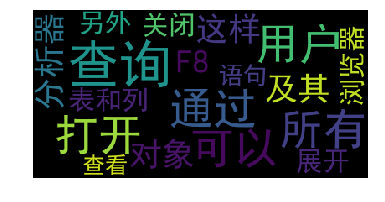

In [21]:
import matplotlib.pyplot as plt
plt.imshow(cloudobj)
plt.axis("off")
plt.show()

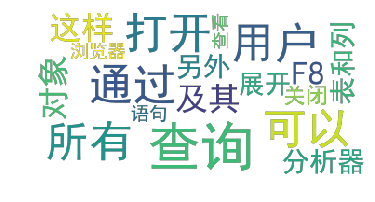

In [22]:
cloudobj = wordcloud.WordCloud(font_path = myfont, 
    width = 360, height = 180,
    mode = "RGBA", background_color = None).generate(text)  

plt.imshow(cloudobj)
plt.axis("off")
plt.show()

In [23]:
# 生成第一章词云
stoplistdf = pd.read_csv(r'D:\资料\教程\NLP基础-网易云课堂\TMData190320\PythonData\停用词.txt', names=["w"], sep="aaa", encoding="utf-8")
stoplist = list(stoplistdf.w)
def m_cut(intxt):
    return [w for w in jieba.cut(intxt) if w not in stoplist]

stoplist

d:\python_install\venv_set\py353\dataanalysiscase\lib\site-packages\ipykernel_launcher.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  


[',',
 '，',
 '、',
 '；',
 ':',
 '：',
 '!',
 '！',
 '？',
 '.',
 '。',
 '“',
 '”',
 '[',
 '［',
 '［］',
 '［＊］',
 '［①］',
 '［⑩］',
 '［①①］',
 '［①②］',
 '［①③］',
 '［①④］',
 '［①⑤］',
 '［①⑥］',
 '［①⑦］',
 '［①⑧］',
 '［①⑨］',
 '［①ａ］',
 '［①Ａ］',
 '［①Ｂ］',
 '［①ｃ］',
 '［①Ｃ］',
 '［①ｄ］',
 '［①Ｄ］',
 '［①ｅ］',
 '［①Ｅ］',
 '［①ｇ］',
 '［①ｈ］',
 '［①ｉ］',
 '［①ｏ］',
 '［②',
 '［②］',
 '［②①］',
 '［②⑩］',
 '［②②］',
 '［②③］',
 '［②④',
 '［②⑤］',
 '［②⑥］',
 '［②⑦］',
 '［②⑧］',
 '［②ａ］',
 '［②ｂ］',
 '［②Ｂ］',
 '［②ｃ］',
 '［②ｄ］',
 '［②ｅ］',
 '［②ｆ］',
 '［②ｇ］',
 '［②ｈ］',
 '［②ｊ］',
 '［③］',
 '［③①］',
 '［③ａ］',
 '［③ｂ］',
 '［③ｃ］',
 '［③ｄ］',
 '［③ｅ］',
 '［③Ｆ］',
 '［③ｇ］',
 '［③ｈ］',
 '［④］',
 '［④ａ］',
 '［④ｂ］',
 '［④ｃ］',
 '［④ｄ］',
 '［④ｅ］',
 '［⑤］',
 '［⑤］］',
 '［⑤ａ］',
 '［⑤ｂ］',
 '［⑤ｅ］',
 '［⑥］',
 '［⑦］',
 '［⑧］',
 '［⑨］',
 ']',
 '］',
 '］［',
 '］∧′＝［',
 '｛－',
 '｝',
 '｝＞',
 '《',
 '》',
 '@',
 '~',
 '──',
 '阿',
 '呵',
 '呵呵',
 '啊',
 '啊哈',
 '啊呀',
 '啊哟',
 '哎',
 '哎呀',
 '哎哟',
 '唉',
 '挨次',
 '挨个',
 '挨家挨户',
 '挨门挨户',
 '挨门逐户',
 '挨着',
 '嗳',
 '安全',
 '俺',
 '俺们',
 '按',
 '按理',
 '按期',
 '按时',
 '按说',
 '按照',
 '暗地里',
 '暗

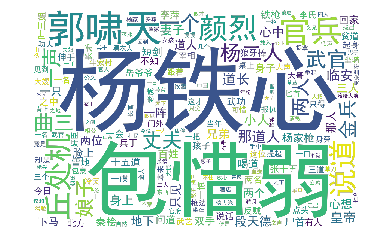

In [24]:
cloudobj = wordcloud.WordCloud(font_path = myfont, 
    width = 1200, height = 800,
    mode = "RGBA", background_color = None,
    stopwords = stoplist).generate(' '.join(jieba.lcut(chapter.txt[1])))  

plt.imshow(cloudobj)
plt.axis("off")
plt.show()

# 文档信息的向量化

In [25]:
# 文档信息的向量化
from gensim.corpora import Dictionary

texts = [['human', 'interface', 'computer']]
dct = Dictionary(texts)
dct.num_nnz

3

In [26]:
# 建立字典
dct.add_documents([["cat", "say", "meow"], ["dog", "this", "is", "not", "a"]])
dct.token2id

{'a': 6,
 'cat': 3,
 'computer': 0,
 'dog': 7,
 'human': 1,
 'interface': 2,
 'is': 8,
 'meow': 4,
 'not': 9,
 'say': 5,
 'this': 10}

In [27]:
# 稀疏向量
dct.doc2bow(["this", "is", "cat", "not", "a", "dog", "a"])

[(3, 1), (6, 2), (7, 1), (8, 1), (9, 1), (10, 1)]

In [28]:
dct.doc2bow(["this", "is", "cat", "not", "a", "dog"], return_missing = True)

([(3, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1)], {})

In [29]:
chapter.head()

,txt,head,mid,len,chap
chap,,,,,
1.0,第一回 风雪惊变钱塘江浩浩江水，日日夜夜无穷无休的从两浙西路临安府牛家村边绕过，东流入海。江...,-224,第钱那几那“他那为若“众村郭小郭张郭张郭张郭张杨杨只隔郭张砰张郭张杨张郭郭杨当便只曲郭郭却曲...,27448,227.0
2.0,第二回 江南七怪颜烈跨出房门，过道中一个中年士人拖着鞋皮，踢跶踢跶的直响，一路打着哈欠迎面过...,-198,第颜颜那颜颜店包包过盖包过盖那包只颜包颜包完完包完突那那完他完那那完这完只完两忽完完完看过和...,25414,402.0
3.0,第三回 黄沙莽莽寺里僧众见焦木圆寂，尽皆悲哭。有的便为伤者包扎伤处，抬入客舍。忽听得巨钟下的...,-196,第寺忽柯朱法过过丘柯丘朱丘柯柯江丘丘韩丘江丘这韩丘丘丘丘柯全丘韩丘丘韩段段段他李过段李段段每...,22813,597.0
4.0,第四回 黑风双煞完颜洪熙笑道：“好，再打他个痛快。”蒙古兵前哨报来：“王罕亲自前来迎接大金国...,-203,第完沙王王酒铁王完第完哲铁桑完帐铁铁铁哲蒙完完桑桑四赤铁完次白拖那拖那拖拖都四都郭都正都那这...,23324,824.0
5.0,第五回 弯弓射雕一行人下得山来，走不多时，忽听前面猛兽大吼声一阵阵传来。韩宝驹一提缰，胯下黄...,-160,第一韩这郭郭郭朱韩拖郭忽铁完铁都她两铁四铁桑铁完铁全铁江韩江当六全他韩每六漠在朔这韩朱七这南...,20706,815.0


In [30]:
stoplistdf = pd.read_csv(r'D:\资料\教程\NLP基础-网易云课堂\TMData190320\PythonData\停用词.txt', names=["w"], sep="aaa", encoding="utf-8")
stoplist = list(stoplistdf.w)

# 词条矩阵
# 输入一章文字转为分好词的一个列表
def m_cut(intxt):
    return [w for w in jieba.cut(intxt) if w  not in stoplist and len(w) > 1]

# 为每一章构造一个分好词的df
def m_appdf(chapnum):
    tmpdf = pd.DataFrame(m_cut(chapter.txt[chapnum + 1]), columns=["word"])
    tmpdf["chap"] = chapter.index[chapnum]
    return tmpdf

d:\python_install\venv_set\py353\dataanalysiscase\lib\site-packages\ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


In [31]:
df0 = pd.DataFrame(columns=["word", "chap"])

# 将每一章分好词的df加入df0
for i in range(len(chapter)):
    df0 = df0.append(m_appdf(i))
df0.tail()

,word,chap
6054,黄蓉,40.0
6055,事迹,40.0
6056,神雕侠侣,40.0
6057,中续,40.0
6058,叙述,40.0


In [32]:
# 序列化
df0.groupby(["word", "chap"]).agg("size").tail(10)

word  chap
龙绡    8.0     1
龙行虎步  30.0    1
龙语    28.0    1
龙飞    36.0    1
      37.0    2
龙马    5.0     1
龙骨    19.0    1
      20.0    1
龟兹    30.0    1
龟息功   37.0    1
dtype: int64

In [33]:
# 透视表 每章词汇出现多少次
t2d = pd.crosstab(df0.word, df0.chap)
len(t2d)

43684

In [34]:
t2d

chap,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,...,31.0,32.0,33.0,34.0,35.0,36.0,37.0,38.0,39.0,40.0
word,,,,,,,,,,,,,,,,,,,,,
1265,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
Beatrice,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Butt,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Charlotte,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Dark,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
龙飞,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,2,0,0,0
龙马,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
龙骨,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [35]:
# 词汇在全文中出现的次数，也就是词频
totnum = t2d.agg(func="sum", axis=1)
totnum

word
1265         1
Beatrice     1
Butt         1
Charlotte    1
Dark         1
            ..
龙飞           3
龙马           1
龙骨           2
龟兹           1
龟息功          1
Length: 43684, dtype: int64

In [36]:
# 使用sklearn生成标准格式矩阵
from sklearn.feature_extraction.text import CountVectorizer

countvec = CountVectorizer(min_df=2)  # min_df出现两次以上才会报错
analyze = countvec.build_analyzer()
analyze('郭靖 和 哀牢山 三十六 剑 。')

['郭靖', '哀牢山', '三十六']

In [37]:
countvec.fit(['郭靖 和 黄蓉 哀牢山 三十六 剑 。', '黄蓉 和 郭靖 郭靖'])

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=2,
                ngram_range=(1, 1), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [38]:
countvec.get_feature_names()  # 词汇列表

['郭靖', '黄蓉']

In [39]:
countvec.vocabulary_  # 词条字典

{'郭靖': 0, '黄蓉': 1}

In [40]:
x = countvec.transform(['郭靖 和 黄蓉 哀牢山 三十六 剑 。', '黄蓉 和 郭靖 郭靖'])
type(x)

scipy.sparse.csr.csr_matrix

In [41]:
x.todense()  # 将稀疏矩阵直接转换为标准格式矩阵

matrix([[1, 1],
        [2, 1]], dtype=int64)

In [42]:
countvec = CountVectorizer(min_df=1)  # min_df出现两次以上才会报错
analyze = countvec.build_analyzer()
x = countvec.fit_transform(['郭靖 和 黄蓉 哀牢山 三十六 剑 。', '黄蓉 和 郭靖 郭靖']) # 一次转为标准格式矩阵
print(x)

  (0, 2)	1
  (0, 3)	1
  (0, 1)	1
  (0, 0)	1
  (1, 2)	2
  (1, 3)	1


In [43]:
countvec.vocabulary_  # 词条字典

{'三十六': 0, '哀牢山': 1, '郭靖': 2, '黄蓉': 3}

In [44]:
countvec.get_feature_names()  # 词汇列表

['三十六', '哀牢山', '郭靖', '黄蓉']

In [45]:
x.todense()  # 列表里面每一个位置代表一个词，数字代表该词出现的频次

matrix([[1, 1, 1, 1],
        [0, 0, 2, 1]], dtype=int64)

In [46]:
# 使用sklearn生成doc2bow矩阵
rawchap = [" ".join(m_cut(w)) for w in chapter.txt.iloc[:5]]
rawchap[0]

'第一回 风雪 惊变 钱塘江 浩浩 江水 日日夜夜 无穷 无休 浙西 临安 牛家村 绕过 流入 江畔 一排 数十株 柏树 叶子 火烧 般红 八月 天时 村前村后 野草 起始 变黄 一抹 斜阳 映照 之下 更增 几分 萧索 两株 松树 围着 一堆 村民 男男女女 十几个 小孩 正自 聚精会神 一个 瘦削 老者 说话 说话 五十 年纪 一件 青布 长袍 早洗 褪成 蓝灰 带白 两片 梨花 木板 几下 左手 竹棒 羯鼓 敲起 唱道 小桃 无主自 开花 烟草 茫茫 晚鸦 几处 败垣围 故井 向来 说话 木板 几下 说道 这首 七言诗 兵火 过后 家家户户 残瓦 破败 之地 小人 叶老汉 一家 四口 悲欢离合 他四人 金兵 冲散 好容易 团聚 欢天喜地 回到 故乡 卫州 房屋 金兵 干干净净 无可奈何 只得 京城 汴梁 生计 料想 天有不测风云 人有旦夕祸福 他四人 刚进 汴梁 迎面 一队 金兵 带兵 头儿 一双 三角 眼觑 叶三姐 美貌 下马 一把 抱住 哈哈大笑 放上 马鞍 说道 小姑娘 回家 服侍 老爷 叶三姐 拼命 挣扎 那金兵 长官 喝道 不肯 父母 兄弟 提起 狼牙棒 棒打 叶四郎 头上 登时 脑浆 迸裂 一命呜呼 阴世 新添 枉死鬼 阳间 不见 少年人 叶老汉 妈妈 搂住 儿子 尸体 放声大哭 长官 提起 狼牙棒 一棒 一个 叶三姐 啼哭 说道 长官 凶恶 回家 长官 大喜 叶三姐 带得 回家 叶三姐 不防 抢步 拔出 长官 腰刀 对准 心口 挺刀 说时迟 那时快 钢刀 刺去 眼见 可报 父母 兄弟 大仇 长官 久经 战阵 武艺 精熟 顺手 一推 叶三姐 登时 长官 一声 贱人 叶三姐 举起 钢刀 脖子 中一勒 可怜 花容月貌 无双 惆怅 芳魂 九泉 一段 一段 村民 无不 咬牙切齿 愤怒 叹息 那人 众位 欺心 举头 三尺 神明 作恶 报应 天下 凶徒 人吃人 那金兵 大宋 天下 杀人放火 奸淫掳掠 无恶不作 不见 报应 只怪 大宋 官家 不争气 中国 本来 兵多将广 见到 金兵 到来 远远地 逃之夭夭 剩下 老百姓 遭殃 好似 叶三姐 一家 惨祸 江北 之地 成千成万 家常便饭 诸君 江南 天堂 怕只怕 金兵 何日 到来 宁作 太平 莫为 乱世 小人 张十五 今日 服侍 众位 听客 一段 说话 叫作 叶三姐 节烈 话本 说彻 散场 两片 梨花 木板 啪啪 一

In [47]:
countvec = CountVectorizer(min_df=5)
res = countvec.fit_transform(rawchap)
res

<5x253 sparse matrix of type '<class 'numpy.int64'>'
	with 1265 stored elements in Compressed Sparse Row format>

In [48]:
res.todense()[0]

matrix([[ 32,   7,   3,   4,   7,  14,  15,   4,  29,   4,   9,   7,   2,
           2,   2,   1,  15,   1,   7,  14,   1,   2,  12,   5,   2,  10,
           5,   4,   5,   3,  36,   1,   6,   2,  13,  26,   1,   1,  21,
           2,   6,   5,   2,   5,  11,   1,   5,   5,   1,   3,   4,   1,
           6,   1,   9,   1,   4,   1,   9,   6,   1,   1,   5,   3,   2,
           3,  16,   1,   4,   3,   4,   2,   4,   6,   2,   2,   1,   1,
           3,   7,   3,  12,   1,   2,   4,   2,   8,  17,   6,   5,   1,
           4,   2,   3,   3,   1,   1,   5,  12,   3,   1,   4,  18,   6,
           3,   4,   1,   4,   7,   2,   6,   5,   1,   3,   1,   4,   4,
           1,  17,   2,   1,   4,   1,   2,   3,   5,   4,   7,   3,   5,
          18,  15,   1,   2,   2,   2,   2,   5,   2,   3,   6,   6,   4,
           5,   3,   3,   4,   2,   4,   2,   6,   1,   3,   4,   7,   2,
           4,   5,   1,   3,   3,   4,   2,   3,   2,   1,   1,   5,   4,
           9,   2,   7,  11, 148,   3,

# TF-IDF

## TF-IDF jieba

In [49]:
# tf-idf模型分析
jieba.analyse.extract_tags(chapter.txt[1])

['杨铁心',
 '包惜弱',
 '郭啸天',
 '曲三',
 '颜烈',
 '丘处机',
 '武官',
 '杨二人',
 '官兵',
 '金兵',
 '那道人',
 '道长',
 '娘子',
 '段天德',
 '临安',
 '说道',
 '丈夫',
 '杨家枪',
 '两人',
 '一声']

In [50]:
jieba.analyse.extract_tags(chapter.txt[1], withWeight=True)

[('杨铁心', 0.24762849411185442),
 ('包惜弱', 0.19074086708615814),
 ('郭啸天', 0.1121020885506368),
 ('曲三', 0.06420187019118265),
 ('颜烈', 0.061907123527963605),
 ('丘处机', 0.05606874758141358),
 ('武官', 0.05214136720564871),
 ('杨二人', 0.050127932600251925),
 ('官兵', 0.045420365534180544),
 ('金兵', 0.03812622569504548),
 ('那道人', 0.03526767340618614),
 ('道长', 0.03295362745044087),
 ('娘子', 0.030317624981861444),
 ('段天德', 0.028443813512848144),
 ('临安', 0.026013611552040593),
 ('说道', 0.02528828658372988),
 ('丈夫', 0.025135591530793564),
 ('杨家枪', 0.02236334732169349),
 ('两人', 0.021753590765816656),
 ('一声', 0.020913648321762072)]

In [51]:
udict = r"D:\资料\教程\NLP基础-网易云课堂\TMData190320\PythonData\金庸小说词库.txt"
stoplistpath = r"D:\资料\教程\NLP基础-网易云课堂\TMData190320\PythonData\停用词.txt"
jieba.load_userdict(udict)
jieba.analyse.set_stop_words(stoplistpath)
TFres = jieba.analyse.extract_tags(chapter.txt[1], withWeight=True)
TFres[:10]

[('杨铁心', 0.24762849411185442),
 ('包惜弱', 0.19074086708615814),
 ('郭啸天', 0.1121020885506368),
 ('曲三', 0.06420187019118265),
 ('颜烈', 0.061907123527963605),
 ('丘处机', 0.05606874758141358),
 ('武官', 0.05214136720564871),
 ('杨二人', 0.050127932600251925),
 ('官兵', 0.045420365534180544),
 ('金兵', 0.03812622569504548)]

## TFIDF sklearn

In [52]:
from sklearn.feature_extraction.text import TfidfTransformer

txtlist = [" ".join(m_cut(w)) for w in chapter.txt.iloc[:5]]

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(txtlist)

transformer = TfidfTransformer()
tfidf = transformer.fit_transform(X)
tfidf

<5x11621 sparse matrix of type '<class 'numpy.float64'>'
	with 16910 stored elements in Compressed Sparse Row format>

In [53]:
tfidf.toarray()

array([[0.        , 0.        , 0.        , ..., 0.00565068, 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.01960406, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.00666164, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.00651175, ..., 0.        , 0.00651175,
        0.00651175]])

In [54]:
tfidf.todense()

matrix([[0.        , 0.        , 0.        , ..., 0.00565068, 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.01960406, 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.00666164, 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.00651175, ..., 0.        , 0.00651175,
         0.00651175]])

In [55]:
tfidf.todense().shape

(5, 11621)

In [56]:
print("字典长度：", len(vectorizer.vocabulary_))
vectorizer.vocabulary_

字典长度： 11621


{'耳旁风': 9102,
 '救助': 6272,
 '护身符': 5739,
 '虽重': 9563,
 '蹂躏': 10144,
 '突见': 8638,
 '盘形': 8207,
 '拨弄': 5860,
 '统通': 8969,
 '别比': 2306,
 '掌一立': 5992,
 '缩成一团': 8997,
 '不防': 715,
 '理亏': 7955,
 '中气': 895,
 '握住': 6085,
 '单臂': 2619,
 '倒入': 1678,
 '碟儿': 8470,
 '镶满': 10939,
 '空空如也': 8627,
 '没用': 7411,
 '无日': 6495,
 '戮力': 5454,
 '魁梧': 11510,
 '人大': 1274,
 '毫不在意': 7298,
 '枪上': 6985,
 '意想不到': 5360,
 '快如闪电': 5071,
 '世世代代': 736,
 '半首': 2606,
 '要强': 9689,
 '分量': 2255,
 '不休': 553,
 '能来': 9203,
 '回刀': 3350,
 '之约': 1053,
 '两国以': 800,
 '喘气': 3243,
 '数名': 6330,
 '冲上去': 2028,
 '眉头一皱': 8306,
 '生死': 8014,
 '长空': 10968,
 '疯虎': 8085,
 '黑水': 11574,
 '颤动': 11300,
 '有点儿': 6740,
 '私下': 8549,
 '正待': 7155,
 '军万人队': 2006,
 '特长': 7841,
 '拖动': 5818,
 '已代': 4597,
 '头脑': 3858,
 '门来': 10984,
 '挥动': 5933,
 '一时之间': 189,
 '木板': 6782,
 '怒容': 5125,
 '歇歇': 7138,
 '不欲': 642,
 '实非': 4198,
 '带头': 4684,
 '拆骨扬': 5789,
 '这才': 10358,
 '境界': 3522,
 '箭发': 8779,
 '巨獒': 4581,
 '收起': 6197,
 '一马': 357,
 '耳语': 9104,
 '郁闷': 10661,
 '眼泪': 8350,

# gensim

In [57]:
chaplist = [m_cut(w) for w in chapter.txt.iloc[:5]]
chaplist

[['第一回',
  '风雪',
  '惊变',
  '钱塘江',
  '浩浩',
  '江水',
  '日日夜夜',
  '无穷',
  '无休',
  '浙西',
  '临安',
  '牛家村',
  '绕过',
  '流入',
  '江畔',
  '一排',
  '数十株',
  '柏树',
  '叶子',
  '火烧',
  '般红',
  '八月',
  '天时',
  '村前村后',
  '野草',
  '起始',
  '变黄',
  '一抹',
  '斜阳',
  '映照',
  '之下',
  '更增',
  '几分',
  '萧索',
  '两株',
  '松树',
  '围着',
  '一堆',
  '村民',
  '男男女女',
  '十几个',
  '小孩',
  '正自',
  '聚精会神',
  '一个',
  '瘦削',
  '老者',
  '说话',
  '说话',
  '五十',
  '年纪',
  '一件',
  '青布',
  '长袍',
  '早洗',
  '褪成',
  '蓝灰',
  '带白',
  '两片',
  '梨花',
  '木板',
  '几下',
  '左手',
  '竹棒',
  '羯鼓',
  '敲起',
  '唱道',
  '小桃',
  '无主自',
  '开花',
  '烟草',
  '茫茫',
  '晚鸦',
  '几处',
  '败垣围',
  '故井',
  '向来',
  '说话',
  '木板',
  '几下',
  '说道',
  '这首',
  '七言诗',
  '兵火',
  '过后',
  '家家户户',
  '残瓦',
  '破败',
  '之地',
  '小人',
  '叶老汉',
  '一家',
  '四口',
  '悲欢离合',
  '他四人',
  '金兵',
  '冲散',
  '好容易',
  '团聚',
  '欢天喜地',
  '回到',
  '故乡',
  '卫州',
  '房屋',
  '金兵',
  '干干净净',
  '无可奈何',
  '只得',
  '京城',
  '汴梁',
  '生计',
  '料想',
  '天有不测风云',
  '人有旦夕祸福',
  '他四人',
  '刚进',
  '汴梁',
  '迎面',
  '一队',
  '金兵',
  

In [58]:
import gensim

dictionnary = gensim.corpora.Dictionary(chaplist)
corpus = [dictionnary.doc2bow(text) for text in chaplist]
corpus

[[(0, 1),
  (1, 32),
  (2, 1),
  (3, 1),
  (4, 1),
  (5, 1),
  (6, 1),
  (7, 1),
  (8, 7),
  (9, 3),
  (10, 1),
  (11, 1),
  (12, 10),
  (13, 1),
  (14, 1),
  (15, 1),
  (16, 1),
  (17, 1),
  (18, 2),
  (19, 4),
  (20, 1),
  (21, 1),
  (22, 1),
  (23, 1),
  (24, 4),
  (25, 1),
  (26, 1),
  (27, 7),
  (28, 1),
  (29, 14),
  (30, 15),
  (31, 2),
  (32, 1),
  (33, 1),
  (34, 1),
  (35, 4),
  (36, 2),
  (37, 1),
  (38, 29),
  (39, 1),
  (40, 1),
  (41, 1),
  (42, 1),
  (43, 1),
  (44, 2),
  (45, 1),
  (46, 1),
  (47, 6),
  (48, 2),
  (49, 1),
  (50, 1),
  (51, 2),
  (52, 3),
  (53, 1),
  (54, 1),
  (55, 2),
  (56, 4),
  (57, 1),
  (58, 1),
  (59, 1),
  (60, 1),
  (61, 9),
  (62, 1),
  (63, 5),
  (64, 1),
  (65, 7),
  (66, 1),
  (67, 2),
  (68, 1),
  (69, 1),
  (70, 3),
  (71, 5),
  (72, 1),
  (73, 1),
  (74, 1),
  (75, 3),
  (76, 1),
  (77, 1),
  (78, 5),
  (79, 1),
  (80, 1),
  (81, 1),
  (82, 2),
  (83, 2),
  (84, 4),
  (85, 1),
  (86, 4),
  (87, 1),
  (88, 4),
  (89, 1),
  (90, 1),
  (9

In [59]:
tfidf_model = gensim.models.TfidfModel(corpus)
corpus_tfidf = tfidf_model[corpus]
corpus_tfidf

In [60]:
corpus_tfidf[3]

[(11, 0.004046506765681684),
 (12, 0.003535264669983862),
 (13, 0.001767632334991931),
 (17, 0.004046506765681684),
 (18, 0.007258399879248664),
 (25, 0.008093013531363368),
 (28, 0.001767632334991931),
 (31, 0.003535264669983862),
 (34, 0.014516799758497328),
 (36, 0.007258399879248664),
 (40, 0.007258399879248664),
 (48, 0.001767632334991931),
 (55, 0.004046506765681684),
 (58, 0.007258399879248664),
 (71, 0.010605794009951585),
 (73, 0.004046506765681684),
 (78, 0.001767632334991931),
 (92, 0.004046506765681684),
 (96, 0.005302897004975792),
 (98, 0.001767632334991931),
 (103, 0.005302897004975792),
 (104, 0.007258399879248664),
 (112, 0.007258399879248664),
 (120, 0.003535264669983862),
 (124, 0.004046506765681684),
 (128, 0.001767632334991931),
 (130, 0.005302897004975792),
 (133, 0.003535264669983862),
 (137, 0.008093013531363368),
 (154, 0.024746852689887033),
 (155, 0.004046506765681684),
 (175, 0.007258399879248664),
 (181, 0.007258399879248664),
 (190, 0.004046506765681684),


In [61]:
dictionnary.token2id

{'耳旁风': 11276,
 '救助': 7630,
 '护身符': 7530,
 '虽重': 6002,
 '蹂躏': 6162,
 '突见': 2904,
 '盘形': 2781,
 '拨弄': 7558,
 '舍得': 3129,
 '十余里': 858,
 '别比': 6916,
 '掌一立': 9366,
 '缩成一团': 5861,
 '不防': 257,
 '收起': 7614,
 '四位': 7092,
 '握住': 2058,
 '单臂': 6980,
 '倒入': 4259,
 '碟儿': 2853,
 '镶满': 10010,
 '空空如也': 5770,
 '没用': 5494,
 '无日': 10924,
 '戮力': 10788,
 '魁梧': 3813,
 '人大': 459,
 '毫不在意': 5472,
 '枪上': 2375,
 '项圈': 8499,
 '意想不到': 10765,
 '快如闪电': 1739,
 '世世代代': 265,
 '半首': 4448,
 '要强': 6043,
 '分量': 4375,
 '不休': 10172,
 '能来': 9789,
 '回刀': 7101,
 '一败涂地': 8581,
 '两国以': 294,
 '喘气': 7078,
 '数名': 10903,
 '冲上去': 672,
 '眉头一皱': 5691,
 '生死': 2711,
 '长空': 10015,
 '疯虎': 9631,
 '黑水': 8540,
 '忽见': 1747,
 '颤动': 11563,
 '有点儿': 2280,
 '碰中': 9690,
 '正待': 2434,
 '军万人队': 6857,
 '求和': 2489,
 '特长': 11094,
 '拖动': 1981,
 '已代': 1604,
 '瞬地望': 8022,
 '门来': 3649,
 '挥动': 2017,
 '一时之间': 80,
 '木板': 2295,
 '怒容': 7427,
 '躲避': 3394,
 '歇歇': 2428,
 '不欲': 10185,
 '不愉': 4015,
 '带头': 4906,
 '拆骨扬': 5131,
 '这才': 3442,
 '境界': 1212,
 '箭发': 2947,
 '巨獒':

# TextRank算法

In [62]:
jieba.analyse.textrank(chapter.txt[1], topK=20, withWeight=True)

[('官兵', 1.0),
 ('武官', 0.9345579065511221),
 ('丘处机', 0.7539824011503895),
 ('娘子', 0.7155307916978315),
 ('临安', 0.6130020874990976),
 ('丈夫', 0.6064376493844338),
 ('金兵', 0.5896128743710382),
 ('说道', 0.587795800855132),
 ('小人', 0.5290567540116105),
 ('只见', 0.4741898630165618),
 ('皇帝', 0.45512132613925366),
 ('道人', 0.416291038289817),
 ('妻子', 0.392142660061857),
 ('道长', 0.37094093803427997),
 ('百姓', 0.3461426530695753),
 ('短剑', 0.3319993652624577),
 ('心想', 0.30596685605677904),
 ('铁枪', 0.2995617775079041),
 ('贫道', 0.29762914278529157),
 ('双手', 0.28817802592705943)]

# 抽取文档主题

In [63]:
cleanchap = [" ".join(m_cut(w)) for w in chapter.txt]
cleanchap

['第一回 风雪 惊变 钱塘江 浩浩 江水 日日夜夜 无穷 无休 浙西 临安 牛家村 绕过 流入 江畔 一排 数十株 柏树 叶子 火烧 般红 八月 天时 村前村后 野草 起始 变黄 一抹 斜阳 映照 之下 更增 几分 萧索 两株 松树 围着 一堆 村民 男男女女 十几个 小孩 正自 聚精会神 一个 瘦削 老者 说话 说话 五十 年纪 一件 青布 长袍 早洗 褪成 蓝灰 带白 两片 梨花 木板 几下 左手 竹棒 羯鼓 敲起 唱道 小桃 无主自 开花 烟草 茫茫 晚鸦 几处 败垣围 故井 向来 说话 木板 几下 说道 这首 七言诗 兵火 过后 家家户户 残瓦 破败 之地 小人 叶老汉 一家 四口 悲欢离合 他四人 金兵 冲散 好容易 团聚 欢天喜地 回到 故乡 卫州 房屋 金兵 干干净净 无可奈何 只得 京城 汴梁 生计 料想 天有不测风云 人有旦夕祸福 他四人 刚进 汴梁 迎面 一队 金兵 带兵 头儿 一双 三角 眼觑 叶三姐 美貌 下马 一把 抱住 哈哈大笑 放上 马鞍 说道 小姑娘 回家 服侍 老爷 叶三姐 拼命 挣扎 那金兵 长官 喝道 不肯 父母 兄弟 提起 狼牙棒 棒打 叶四郎 头上 登时 脑浆 迸裂 一命呜呼 阴世 新添 枉死鬼 阳间 不见 少年人 叶老汉 妈妈 搂住 儿子 尸体 放声大哭 长官 提起 狼牙棒 一棒 一个 叶三姐 啼哭 说道 长官 凶恶 回家 长官 大喜 叶三姐 带得 回家 叶三姐 不防 抢步 拔出 长官 腰刀 对准 心口 挺刀 说时迟 那时快 钢刀 刺去 眼见 可报 父母 兄弟 大仇 长官 久经 战阵 武艺 精熟 顺手 一推 叶三姐 登时 长官 一声 贱人 叶三姐 举起 钢刀 脖子 中一勒 可怜 花容月貌 无双 惆怅 芳魂 九泉 一段 一段 村民 无不 咬牙切齿 愤怒 叹息 那人 众位 欺心 举头 三尺 神明 作恶 报应 天下 凶徒 人吃人 那金兵 大宋 天下 杀人放火 奸淫掳掠 无恶不作 不见 报应 只怪 大宋 官家 不争气 中国 本来 兵多将广 见到 金兵 到来 远远地 逃之夭夭 剩下 老百姓 遭殃 好似 叶三姐 一家 惨祸 江北 之地 成千成万 家常便饭 诸君 江南 天堂 怕只怕 金兵 何日 到来 宁作 太平 莫为 乱世 小人 张十五 今日 服侍 众位 听客 一段 说话 叫作 叶三姐 节烈 话本 说彻 散场 两片 梨花 木板 啪啪 

In [64]:
from sklearn.feature_extraction.text import CountVectorizer

countvec = CountVectorizer(min_df=5)
wordmtx = countvec.fit_transform(cleanchap)
wordmtx

<40x6519 sparse matrix of type '<class 'numpy.int64'>'
	with 72353 stored elements in Compressed Sparse Row format>

In [65]:
transformer = TfidfTransformer()
tfidf = transformer.fit_transform(wordmtx)
tfidf

<40x6519 sparse matrix of type '<class 'numpy.float64'>'
	with 72353 stored elements in Compressed Sparse Row format>

## 设定LDA模型

In [66]:
from sklearn.decomposition import LatentDirichletAllocation

n_topics = 10
ldamodel = LatentDirichletAllocation(n_components=n_topics)

In [67]:
ldamodel.fit(wordmtx)

LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
                          evaluate_every=-1, learning_decay=0.7,
                          learning_method='batch', learning_offset=10.0,
                          max_doc_update_iter=100, max_iter=10,
                          mean_change_tol=0.001, n_components=10, n_jobs=None,
                          perp_tol=0.1, random_state=None,
                          topic_word_prior=None, total_samples=1000000.0,
                          verbose=0)

In [68]:
print(ldamodel.components_.shape)
ldamodel.components_[:2]

(10, 6519)


array([[0.10002407, 1.44625922, 3.46101465, ..., 0.1000081 , 0.10008478,
        2.09288129],
       [0.1       , 0.1       , 0.1       , ..., 0.1       , 0.1       ,
        0.1       ]])

In [69]:
# 主题词打印函数
def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic #%d:" % topic_idx)
        print(" ".join([feature_names[i] 
                        for i in topic.argsort()[:-n_top_words - 1:-1]]))
    print()

In [70]:
n_top_words = 12
tf_feature_names = countvec.get_feature_names()
print_top_words(ldamodel, tf_feature_names, n_top_words)

Topic #0:
欧阳锋 周伯通 郭靖 洪七公 师父 黄蓉 武功 欧阳克 说道 功夫 黄药师 师哥
Topic #1:
忧急 残暴 寻郭靖 忽感 剑术 侠义道 保佑 爱护 稍加 通晓 不弱 断臂
Topic #2:
帮主 杨康 丐帮 鲁有脚 裘千仞 郭靖 群丐 黄蓉 长老 兄弟 铁掌帮 帮众
Topic #3:
忧急 残暴 寻郭靖 忽感 剑术 侠义道 保佑 爱护 稍加 通晓 不弱 断臂
Topic #4:
郭靖 丘处机 铁木真 柯镇恶 朱聪 一个 成吉思汗 蒙古 拖雷 韩小莹 华筝 说道
Topic #5:
忧急 残暴 寻郭靖 忽感 剑术 侠义道 保佑 爱护 稍加 通晓 不弱 断臂
Topic #6:
杨铁心 包惜弱 郭啸天 丘处机 官兵 段天德 说道 金兵 一个 杨二人 黎生 一声
Topic #7:
王处一 郭靖 完颜康 侯通海 彭连虎 沙通天 小王爷 少年 一个 说道 少女 黄蓉
Topic #8:
忧急 残暴 寻郭靖 忽感 剑术 侠义道 保佑 爱护 稍加 通晓 不弱 断臂
Topic #9:
黄蓉 郭靖 黄药师 说道 洪七公 师父 两人 一个 心中 武功 爹爹 不知



## gensim LDA模型

In [72]:
chaplist = [m_cut(w) for w in chapter.txt]
chaplist

[['第一回',
  '风雪',
  '惊变',
  '钱塘江',
  '浩浩',
  '江水',
  '日日夜夜',
  '无穷',
  '无休',
  '浙西',
  '临安',
  '牛家村',
  '绕过',
  '流入',
  '江畔',
  '一排',
  '数十株',
  '柏树',
  '叶子',
  '火烧',
  '般红',
  '八月',
  '天时',
  '村前村后',
  '野草',
  '起始',
  '变黄',
  '一抹',
  '斜阳',
  '映照',
  '之下',
  '更增',
  '几分',
  '萧索',
  '两株',
  '松树',
  '围着',
  '一堆',
  '村民',
  '男男女女',
  '十几个',
  '小孩',
  '正自',
  '聚精会神',
  '一个',
  '瘦削',
  '老者',
  '说话',
  '说话',
  '五十',
  '年纪',
  '一件',
  '青布',
  '长袍',
  '早洗',
  '褪成',
  '蓝灰',
  '带白',
  '两片',
  '梨花',
  '木板',
  '几下',
  '左手',
  '竹棒',
  '羯鼓',
  '敲起',
  '唱道',
  '小桃',
  '无主自',
  '开花',
  '烟草',
  '茫茫',
  '晚鸦',
  '几处',
  '败垣围',
  '故井',
  '向来',
  '说话',
  '木板',
  '几下',
  '说道',
  '这首',
  '七言诗',
  '兵火',
  '过后',
  '家家户户',
  '残瓦',
  '破败',
  '之地',
  '小人',
  '叶老汉',
  '一家',
  '四口',
  '悲欢离合',
  '他四人',
  '金兵',
  '冲散',
  '好容易',
  '团聚',
  '欢天喜地',
  '回到',
  '故乡',
  '卫州',
  '房屋',
  '金兵',
  '干干净净',
  '无可奈何',
  '只得',
  '京城',
  '汴梁',
  '生计',
  '料想',
  '天有不测风云',
  '人有旦夕祸福',
  '他四人',
  '刚进',
  '汴梁',
  '迎面',
  '一队',
  '金兵',
  

In [74]:
dictionary = gensim.corpora.Dictionary(chaplist)
corpus = [dictionary.doc2bow(text) for text in chaplist]

tfidf_model = gensim.models.TfidfModel(corpus)
corpus_tfidf = tfidf_model[corpus]
corpus_tfidf

In [75]:
from gensim.models.ldamodel import LdaModel

%time ldamodel = LdaModel(corpus, id2word=dictionary, num_topics=10, passes=2 )

Wall time: 2.19 s


In [76]:
ldamodel.print_topics()

[(0,
  '0.009*"郭靖" + 0.007*"黄蓉" + 0.005*"铁木真" + 0.003*"一个" + 0.003*"说道" + 0.003*"欧阳锋" + 0.003*"丘处机" + 0.003*"柯镇恶" + 0.003*"哲别" + 0.002*"蒙古"'),
 (1,
  '0.009*"郭靖" + 0.008*"黄蓉" + 0.003*"欧阳锋" + 0.003*"黄药师" + 0.003*"说道" + 0.003*"洪七公" + 0.003*"师父" + 0.002*"一声" + 0.002*"一个" + 0.002*"武功"'),
 (2,
  '0.011*"郭靖" + 0.008*"黄蓉" + 0.005*"欧阳锋" + 0.004*"说道" + 0.003*"师父" + 0.003*"周伯通" + 0.003*"黄药师" + 0.003*"洪七公" + 0.003*"一个" + 0.002*"裘千仞"'),
 (3,
  '0.010*"郭靖" + 0.006*"丘处机" + 0.005*"周伯通" + 0.004*"黄蓉" + 0.004*"武功" + 0.004*"一个" + 0.004*"说道" + 0.003*"黄药师" + 0.003*"欧阳锋" + 0.003*"师父"'),
 (4,
  '0.016*"郭靖" + 0.008*"黄蓉" + 0.005*"欧阳锋" + 0.004*"一个" + 0.004*"说道" + 0.003*"师父" + 0.003*"心想" + 0.002*"丘处机" + 0.002*"一声" + 0.002*"武功"'),
 (5,
  '0.016*"郭靖" + 0.013*"黄蓉" + 0.007*"洪七公" + 0.006*"欧阳锋" + 0.005*"说道" + 0.005*"黄药师" + 0.005*"师父" + 0.004*"一个" + 0.004*"武功" + 0.003*"两人"'),
 (6,
  '0.009*"郭靖" + 0.006*"黄蓉" + 0.005*"洪七公" + 0.005*"欧阳锋" + 0.003*"师父" + 0.003*"黄药师" + 0.003*"武功" + 0.002*"说道" + 0.002*"两人" + 0.002*"一个"'),
 (7

In [77]:
corpus_lda = ldamodel[corpus_tfidf]
for doc in corpus_lda:
    print(doc)

[(7, 0.9701316)]
[(3, 0.9751957)]
[(0, 0.9681727)]
[(5, 0.97096497)]
[(5, 0.9704783)]
[(5, 0.96905726)]
[(4, 0.9676046)]
[(9, 0.9697993)]
[(4, 0.5385559), (5, 0.17377532), (7, 0.26598465)]
[(9, 0.9795048)]
[(9, 0.9792082)]
[(5, 0.97862804)]
[(9, 0.97306377)]
[(9, 0.97597957)]
[(5, 0.97365713)]
[(5, 0.97750825)]
[(3, 0.9725818)]
[(3, 0.14379866), (5, 0.83687454)]
[(5, 0.9764929)]
[(5, 0.9714432)]
[(5, 0.9768983)]
[(5, 0.97827125)]
[(9, 0.97674984)]
[(9, 0.9677023)]
[(5, 0.10960257), (9, 0.86919546)]
[(5, 0.9772179)]
[(5, 0.9710074)]
[(5, 0.9733226)]
[(5, 0.97587174)]
[(5, 0.9651145)]
[(5, 0.18756717), (9, 0.7848941)]
[(9, 0.9733183)]
[(5, 0.9696538)]
[(5, 0.97925574)]
[(0, 0.5083322), (5, 0.4681076)]
[(5, 0.97734433)]
[(4, 0.97839874)]
[(2, 0.9763098)]
[(5, 0.9770732)]
[(5, 0.97740686)]


In [78]:
ldamodel.get_topics()

array([[9.18179558e-06, 3.39423516e-03, 6.58590361e-05, ...,
        1.00115030e-05, 8.90419051e-06, 1.00664611e-05],
       [1.20030045e-05, 2.22626142e-03, 5.56659470e-05, ...,
        1.10888159e-05, 1.15473604e-05, 1.02315389e-05],
       [1.12478037e-05, 2.52380618e-03, 6.79840159e-05, ...,
        8.43384532e-06, 8.83222310e-06, 8.44845817e-06],
       ...,
       [4.20456163e-05, 2.74929078e-03, 8.46202529e-05, ...,
        7.71263421e-06, 7.37114760e-06, 7.85743941e-06],
       [1.50920905e-05, 2.55241222e-03, 7.36352085e-05, ...,
        1.03860739e-05, 1.08665199e-05, 1.04612109e-05],
       [4.53638131e-06, 3.27543076e-03, 1.42030258e-04, ...,
        3.06655875e-06, 2.89241302e-06, 2.87065222e-06]], dtype=float32)

In [79]:
query = chapter.txt[1]
query_bow = dictionary.doc2bow(m_cut(query))
query_tfidf = tfidf_model[query_bow]
query_tfidf[:10]

[(0, 0.0072627775955036635),
 (2, 0.002221432087630554),
 (3, 0.008943226098128034),
 (4, 0.0029188812318266502),
 (5, 0.0039018805902549234),
 (6, 0.00627977823707539),
 (7, 0.008943226098128034),
 (8, 0.00042965897571412194),
 (9, 0.0009711903982987622),
 (10, 0.005582329092879294)]

In [80]:
ldamodel.get_document_topics(query_bow)

[(7, 0.99987376)]

In [81]:
ldamodel[query_tfidf]

[(7, 0.9701316)]

In [83]:
import pyLDAvis
import pyLDAvis.sklearn

n_topics = 10

countvec = CountVectorizer(min_df=5)
wordmtx = countvec.fit_transform(cleanchap)

ldamodel = LatentDirichletAllocation(n_components=n_topics)
ldamodel.fit(wordmtx)

pyLDAvis.enable_notebook()
pyLDAvis.sklearn.prepare(ldamodel, tfidf, countvec)

AttributeError: 'LdaModel' object has no attribute 'components_'

In [84]:
ldamodel.components_

AttributeError: 'LdaModel' object has no attribute 'components_'